# Re-doing the Iris analysis

## Introduction

In this notebook I will re-do the Iris data analysis using a support vector machine as classifier. I will collect pieces and snippets from our [textbook](http://bit.ly/2xoFamE) and combine them in my own classification of the Iris data set using a support vector machine.

I will setup the analysis using the generic Scikit-Learn steps as explained in the book. I will explain each step in a markdown cell, using my own words.

## Research question
In this research I want to analyse data representing flower petals to classify their special type

## Analysis
[_write a brief introduction to your analysis below. Briefly describe your classifier_]

### 1. load the iris data set (see Introducing Scikit-Learn)
[_describe briefly what your data set is about and where you get the data from_]

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

# the loaded data is part of a learning library
# it contains some test dataset describing flower petals which can be used to train an algorithm that should later
# be able to classify new inputs and decide which specific type of flower it belongs to
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

### 2. create a feature matrix X and a target array y from the data set
[_describe how you are going to prepare the data set and for what reason_]

In [4]:
import numpy as np

# getting feature matrix from set
# this is an array of arrays describing sample data to identify the flower petals
# originally it consists of 4 values for each line
# i truncated each element to 2 elements to allow for easier visualisation later on
# this means that we will only compare sepal length and width
# while ignoring petal length and width

X = np.array([i[:2] for i in iris["data"]])
print("input data:")
print(X)

# creating target array
# this is an array defining the type of the flower petal each item in the input list corresponds to
# the algorithm uses this list to "learn" what characteristics belong to each type
Y = np.array(iris["target"])
print("\nexpected output:")
print(Y)

input data:
[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]


### 3. split the data in a test and train set
[_describe how you are going to split the data set and for what reason_]

(145, 2)
(5, 2)


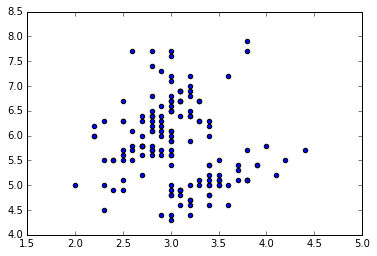

In [5]:
# because I personally do not know anything about flower petals, I have to use some of the provided data to test
# the results of the learning algorithms
# i split of 5 items to use to test, the rest (145 items) will be used to train the algorithm

# split input data
X_learn = X[:-5]
print(X_learn.shape)    # make sure that data has the correct shape (145 samples with two features)
X_test = X[-5:]
print(X_test.shape)     # make sure that data has the correct shape (5 samples with two features)

# split expected data
Y_learn = Y[:-5]
Y_test = Y[-5:]

# importing libraries to visualize dataset as a first look
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# rotating data to retrieve 3 sets of 150 items each instead of 150 sets of 3 items each
# this is neccessary because it is the format expected by matplotlib
input90 = np.rot90(X)

# initialise plot
fig = plt.figure()
ax = fig.add_subplot(111)

# add data to plot and show
ax.scatter(input90[0], input90[1])
plt.show()

### 4. fit the model using the train set, applying the support vector machine
[_describe how you are going to fit the model and what model parameters you are using_]

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]
both in the same 

In [10]:
from sklearn.svm import SVC
from scipy import spatial

def get_matching_percentage(list_1, list_2):
    if not len(list_1) == len(list_2):
        print("list lengths not matching")
        return -1
    count = 0;
    correct_count = 0;
    for i in range(len(list_1)):
        count +=1
        if(list_1[i] == list_2[i]):
            correct_count +=1
    return 100 * (correct_count / count)
        
        
model_types = ["linear", "rbf", "poly"]

models = []
for mt in model_types:
    print("Testing kernel type: " + mt)
    m = SVC(kernel=mt, C=1)
    m.fit(X_learn, Y_learn)
    
    print("Prediction for test data: ")
    prediction = m.predict(X_test)
    print(prediction)
    
    print("Expected result:")
    print(Y_test)
    
    perc = get_matching_percentage(prediction, Y_test)
    #perc = 100 * (1 - spatial.distance.cosine(prediction, Y_test)) 
    print("Percentage: {}".format(perc))
    print("\n")

Testing kernel type: linear
Prediction for test data: 
[2 1 2 2 1]
Expected result:
[2 2 2 2 2]
Percentage: 60.0


Testing kernel type: rbf
Prediction for test data: 
[2 1 2 2 1]
Expected result:
[2 2 2 2 2]
Percentage: 60.0


Testing kernel type: poly
Prediction for test data: 
[2 1 2 1 1]
Expected result:
[2 2 2 2 2]
Percentage: 40.0




## Discussion of result
[_ reflect on the accuracy of your result and whether you have properly answered your research question _]